# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [54]:
# if plotnine is not installed in Jupter then use the following command to install it 
#$ conda install -c conda-forge kneed
!pip install plotnine
#!pip install kneed
!pip install statsmodels
!pip install scipy


Running this project require the following imports 

In [128]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from scipy.spatial.distance import *  
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
#from plotnine import *
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

%matplotlib inline

In [12]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



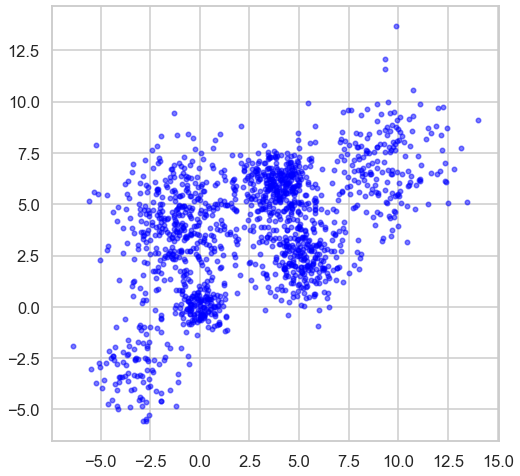

In [13]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

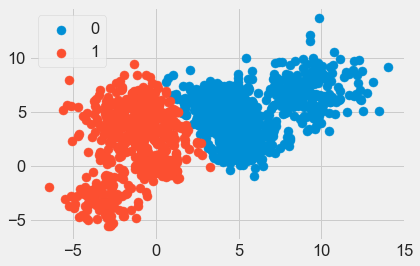

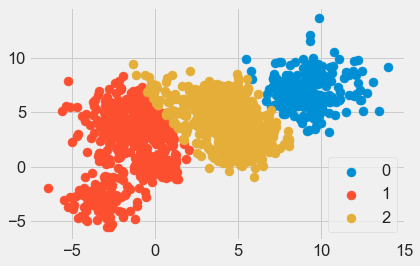

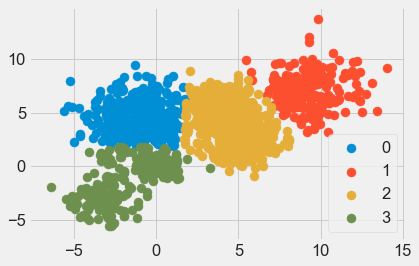

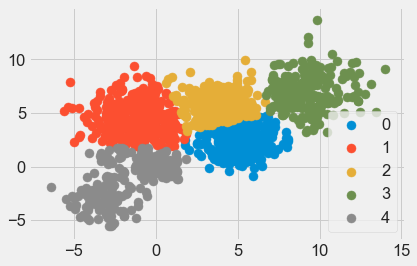

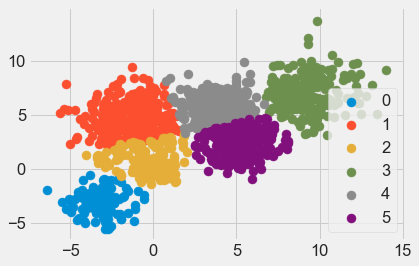

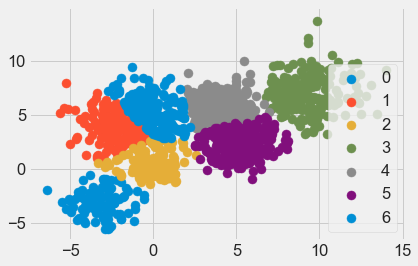

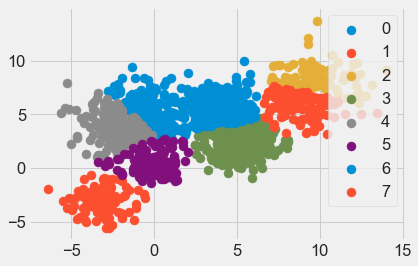

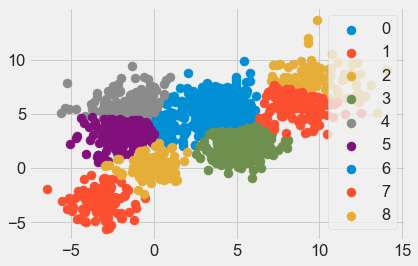

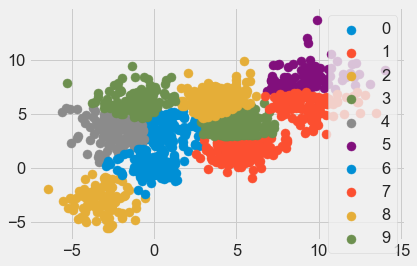

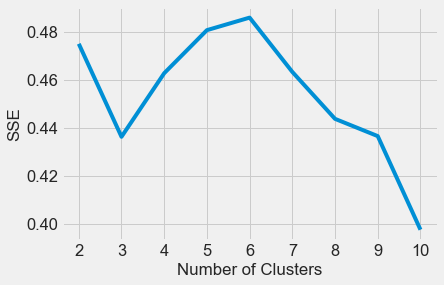

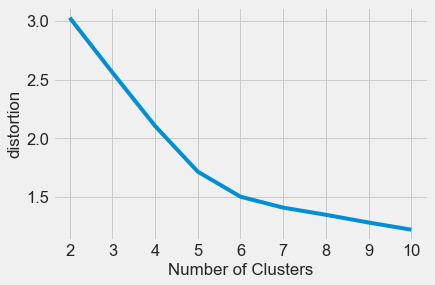

In [58]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(Multi_blob_Data)

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}
SIL_scores=[]
distortions = []
for k in range(2, 11):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            label = kmeans.fit_predict(Multi_blob_Data)
            #print(label)
            distortions.append(sum(np.min(cdist(Multi_blob_Data, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / Multi_blob_Data.shape[0])
            SIL_score = silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean')
            SIL_scores.append(SIL_score)
            u_labels = np.unique(label)
            for i in u_labels:
                plt.scatter(Multi_blob_Data[label == i , 0] , Multi_blob_Data[label == i , 1] , label = i)
            plt.legend()
            plt.show()
            #print('Silhouetter Score: %.3f' % SIL_score)
best_SIL=max(SIL_scores)
K=SIL_scores.index(best_SIL) +2
#print(K)
#print(best_SIL)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), SIL_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), distortions)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("distortion")
plt.show()



### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

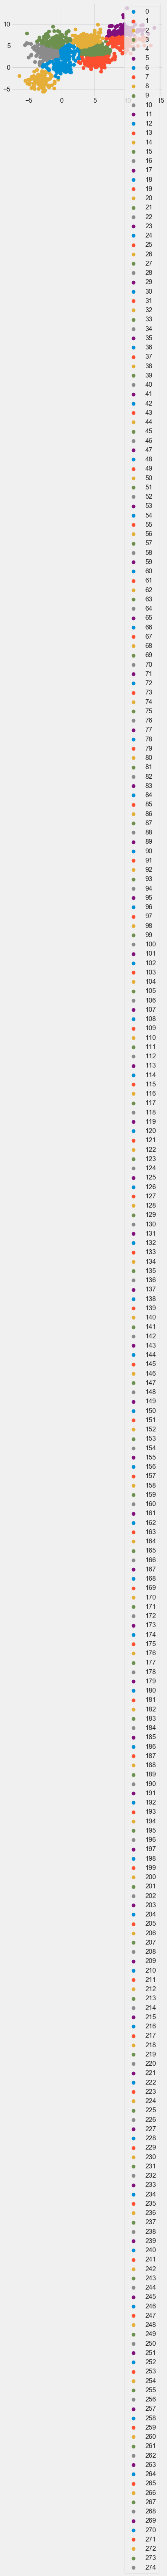

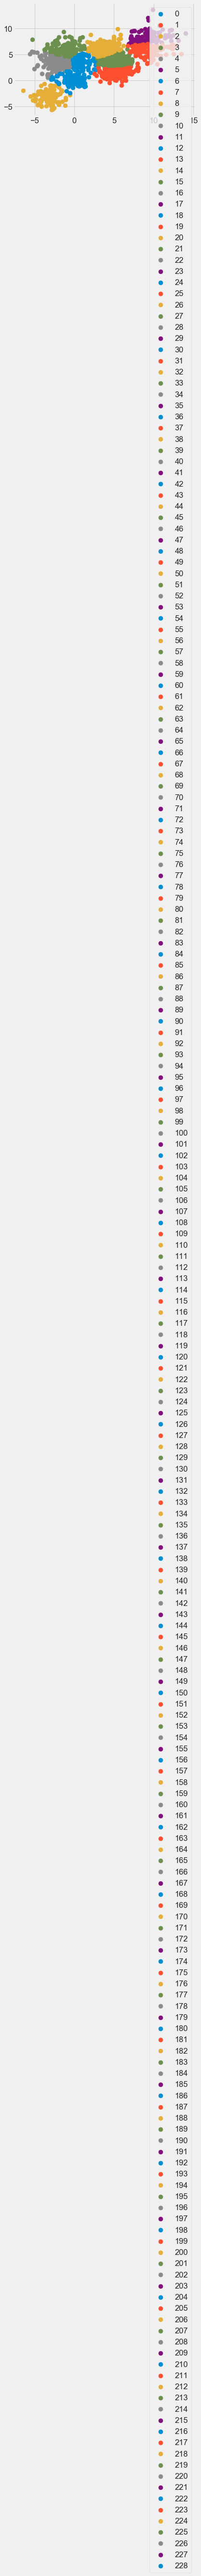

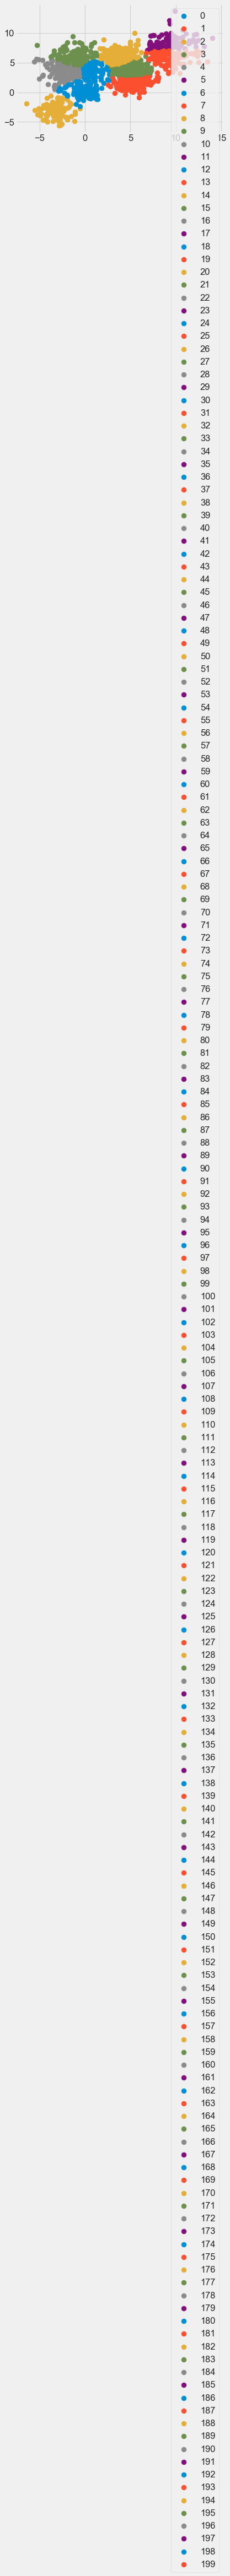

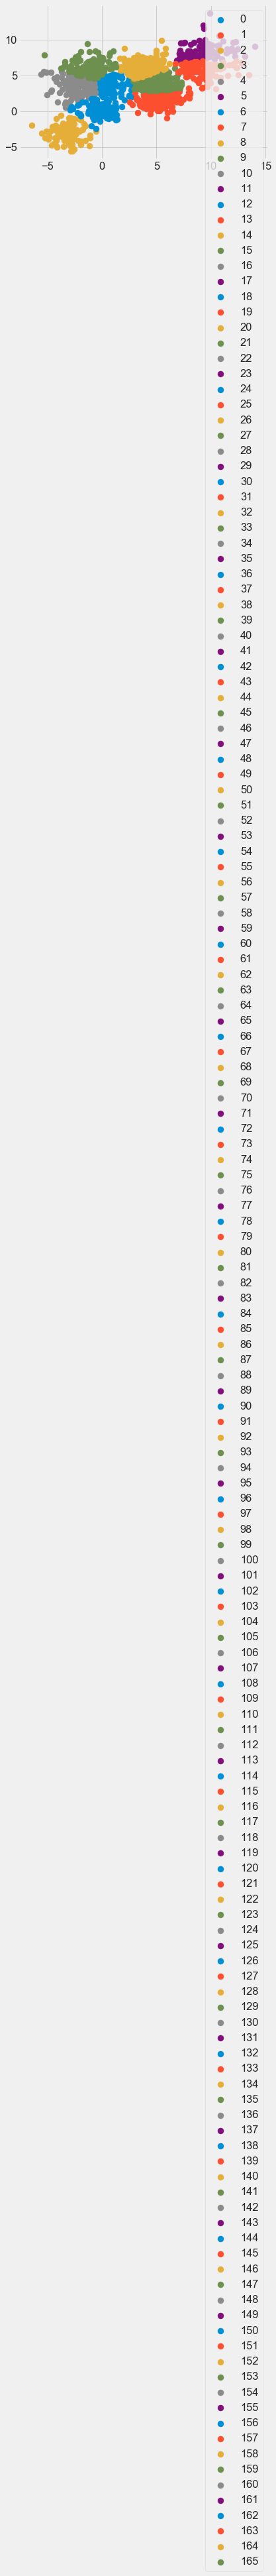

[0.3707037350553734, 0.3586856039133219, 0.3423415195643483, 0.34093328073765305]


In [127]:
SIL_scores1=[]
#best sil_score for euclidean is 0.4702126931832277 at h=2, linkage=ward
#best sil_score for manhattan is 0.46762361386512785 at h=2, linkage=average
#best sil_score for manhattan is 0.3218066204847175 at h=2, linkage=single
#best sil_score for cosdine is 0.35251834131557364 at  h=2, linkage= average
#best sil_score for cosdine is  0.07699405164704985 at h=5, linkage= single
#the bigger the distance_threshold gets the lower the silhouette score gets
for h in range(2, 11):
    model = AgglomerativeClustering(n_clusters=h, affinity='euclidean', linkage ='ward',distance_threshold =None )
    labelh= model.fit_predict(Multi_blob_Data)
    SIL_score1 = silhouette_score(Multi_blob_Data, model.labels_, metric='euclidean')
    SIL_scores1.append(SIL_score1)
    U_labels = np.unique(labelh)
    for i in U_labels:
        plt.scatter(Multi_blob_Data[label == i , 0] , Multi_blob_Data[label == i , 1] , label = i)
    plt.legend()
    plt.show()
print(SIL_scores1)
best_SILh=max(SIL_scores1) 
best_k=SIL_scores1.index(best_SIL1) +2


### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

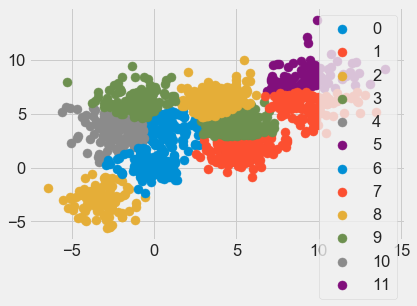

[0 0 0 ... 0 0 0]


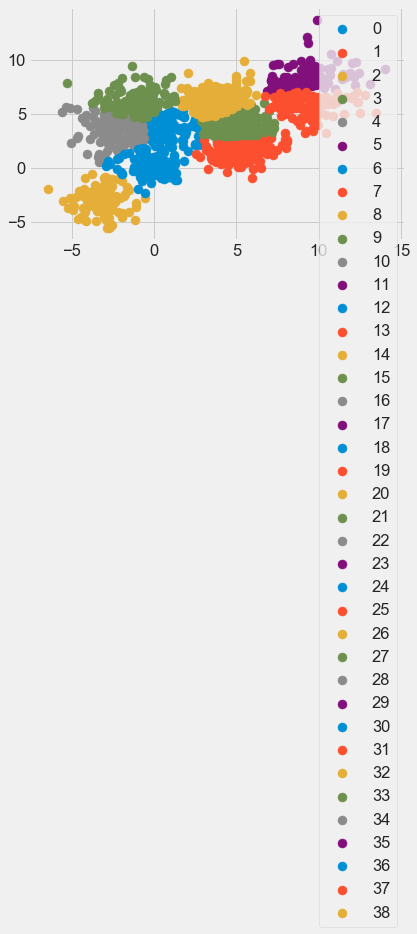

[0 0 0 ... 0 0 0]


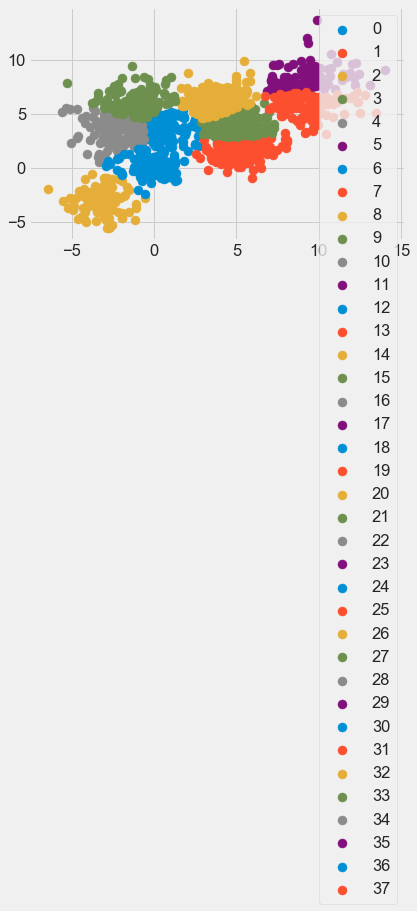

[ 0  0  0 ...  0  0 36]


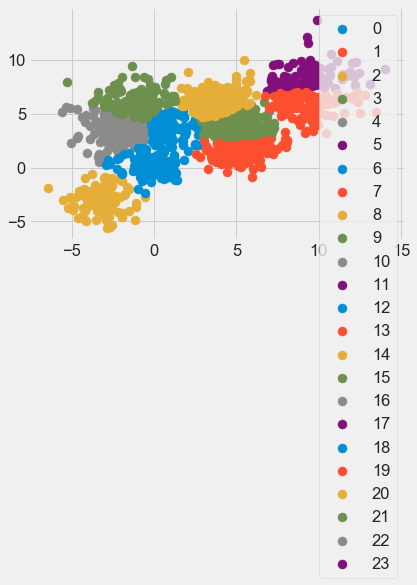

[ 3  0  2 ...  0  0 17]


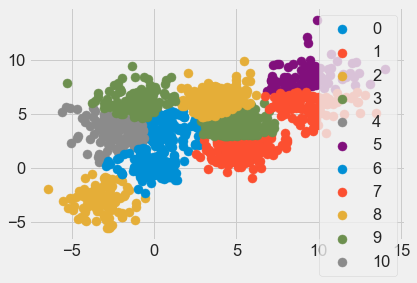

[1 3 1 ... 0 0 7]


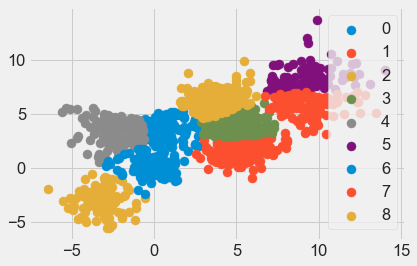

[1 1 1 ... 0 0 4]


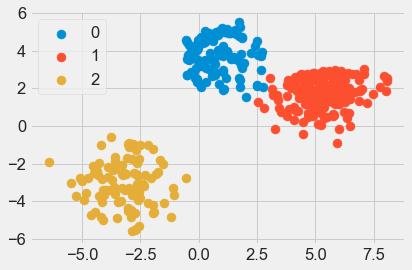

[1 1 1 ... 0 0 1]


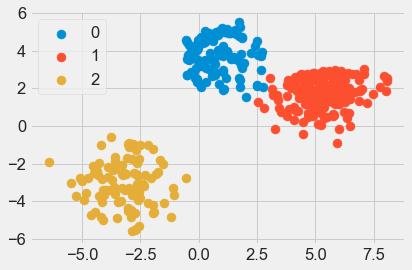

[1 1 1 ... 0 0 1]


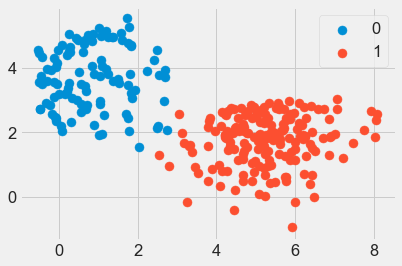

[1 1 1 ... 0 0 1]


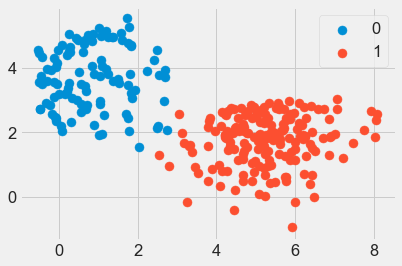

[1 1 1 ... 0 0 1]


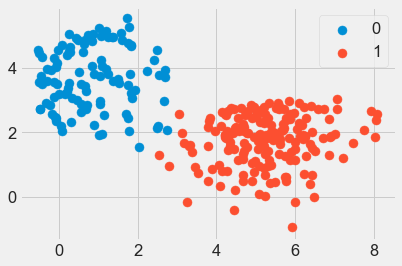

[1 1 1 ... 0 0 1]


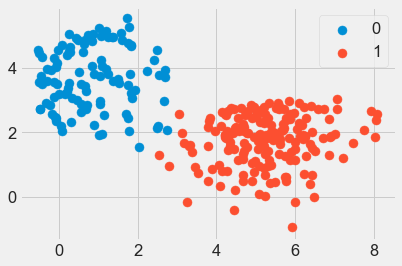

[1 1 1 ... 0 1 1]


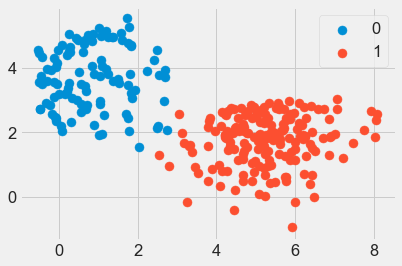

[1 1 1 ... 0 1 1]


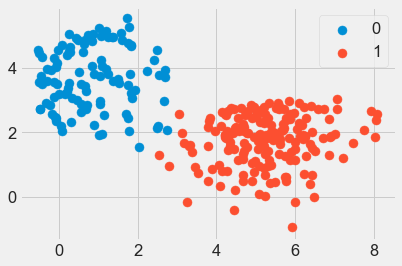

[1 1 1 ... 0 1 1]


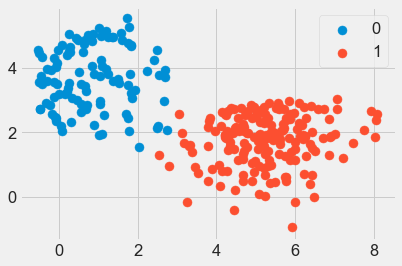

[1 1 1 ... 0 1 1]


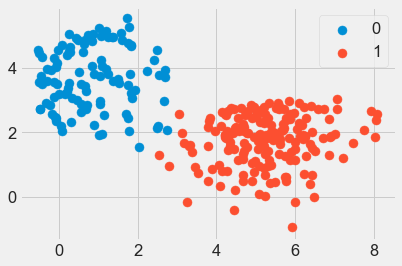

[1 1 1 ... 0 1 1]


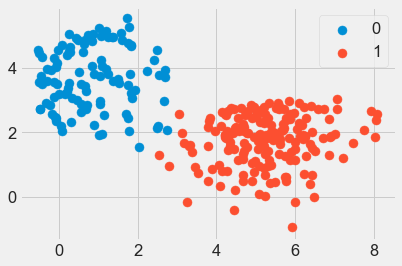

[1 1 1 ... 0 1 1]


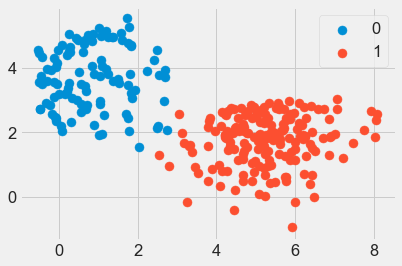

[1 1 1 ... 0 1 1]


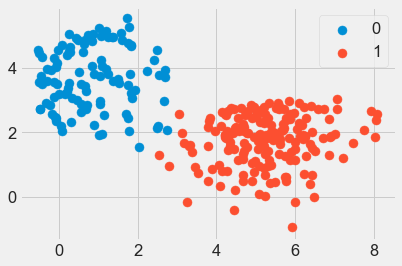

[1 1 1 ... 0 1 1]


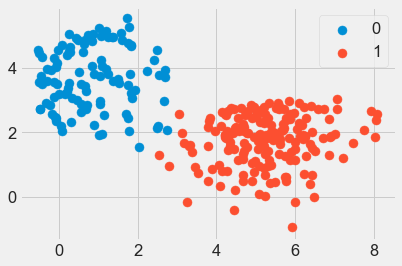

[1 1 1 ... 0 1 1]


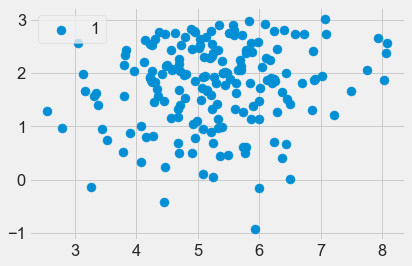

[1 1 1 ... 1 1 1]


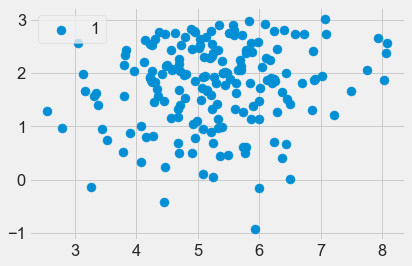

[1 1 1 ... 1 1 1]


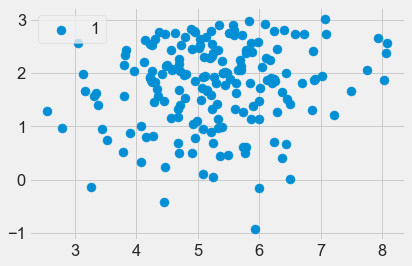

[1 1 1 ... 1 1 1]


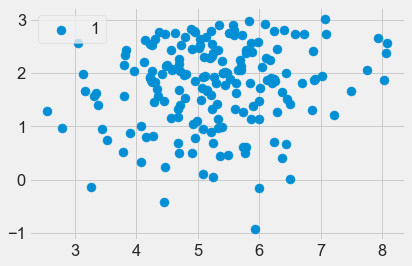

[1 1 1 ... 1 1 1]


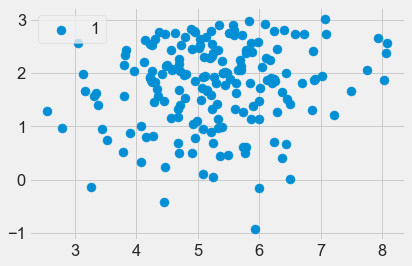

[1 1 1 ... 1 1 1]


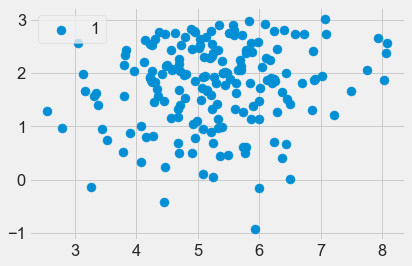

[1 1 1 ... 1 1 1]


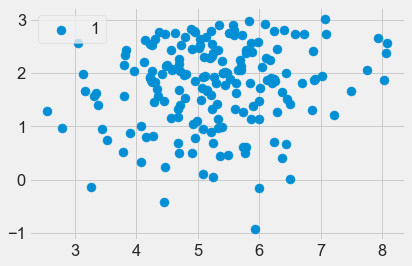

[1 1 1 ... 1 1 1]


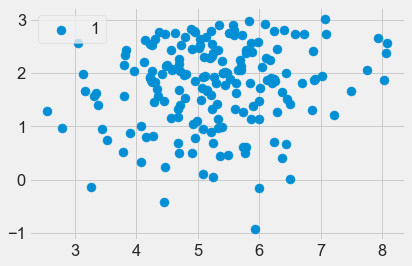

[1 1 1 ... 1 1 1]


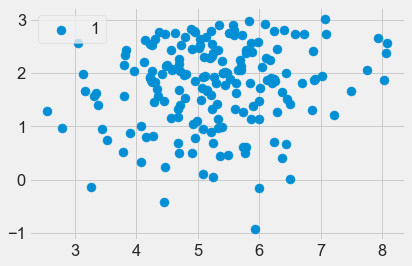

[1 1 1 ... 1 1 1]
[-0.5423348432605972, -0.3999643249301035, -0.13789448202067064, -0.036215514032276665, -0.07318209741938357, -0.24039252244607714, 0.22952137161333858, 0.24526105796744171, 0.3907788734374356, 0.38592246951059755, 0.39636930805804305, 0.4531919763890837, 0.4531919763890837, 0.4531919763890837, 0.43621424543357235, 0.449485491986506, 0.43762353642223145, 0.4479741534934026, 0.4479741534934026, 0.4479741534934026, 0, 0, 0, 0, 0, 0, 0, 0, 0]


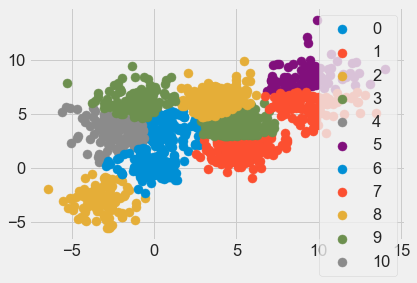

[1 3 1 ... 0 0 7]


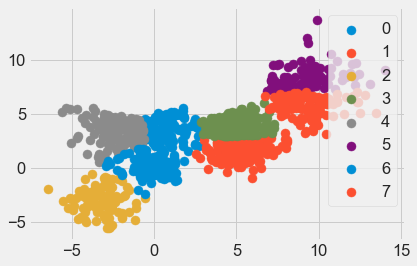

[1 3 1 ... 0 0 6]


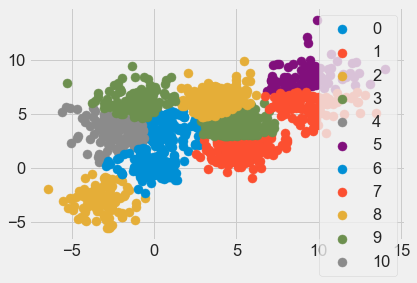

[1 0 1 ... 0 0 6]


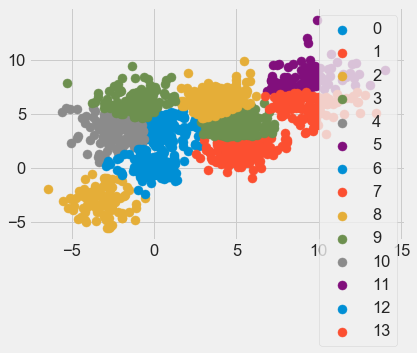

[ 3  0  2 ...  0  0 10]


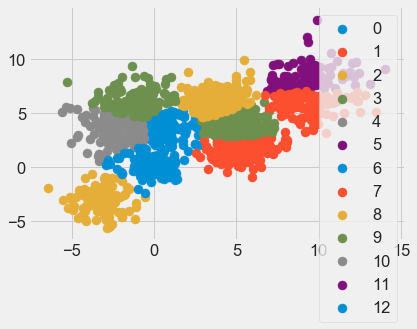

[3 0 2 ... 0 0 9]


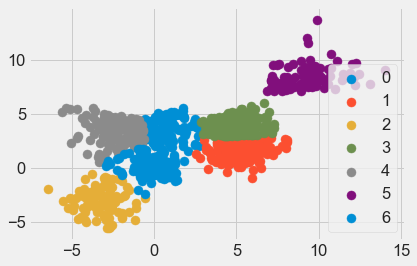

[0 0 0 ... 0 0 6]


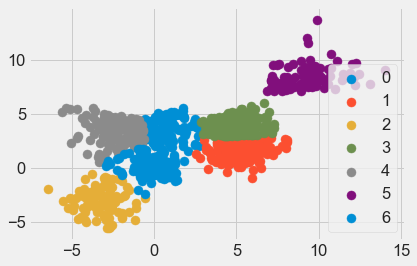

[0 0 0 ... 0 0 0]


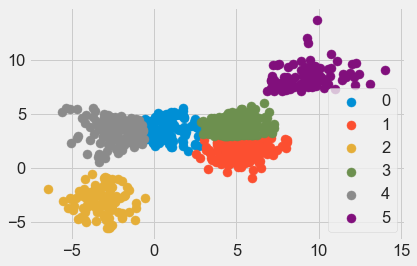

[0 0 0 ... 0 0 0]


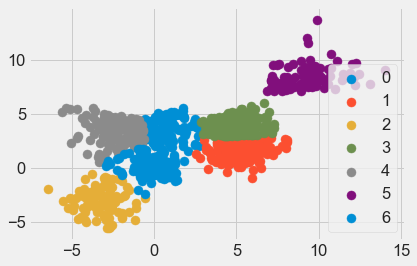

[0 0 0 ... 0 0 0]


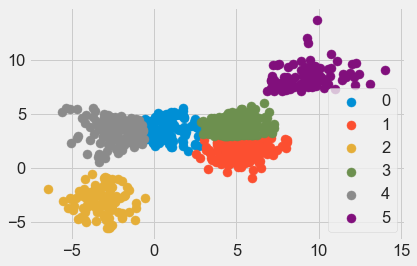

[0 0 0 ... 0 0 0]


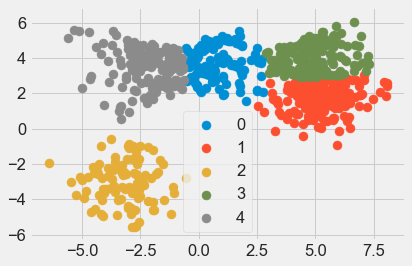

[0 0 0 ... 0 0 0]


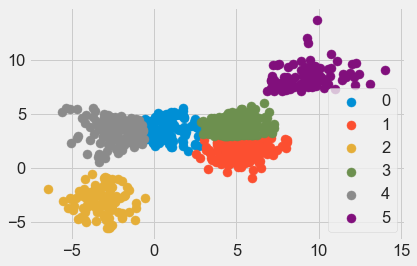

[0 0 0 ... 0 0 0]


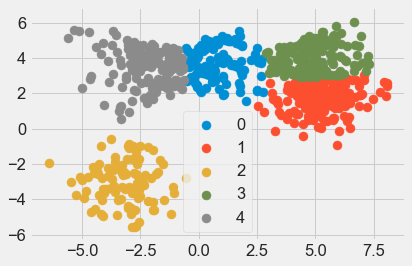

[0 0 0 ... 0 0 0]


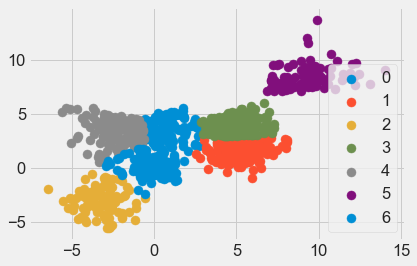

[0 0 0 ... 0 0 0]


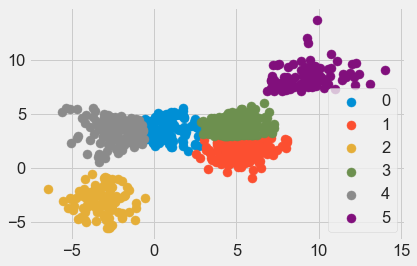

[0 0 0 ... 0 0 0]


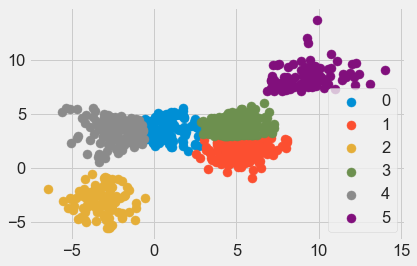

[0 0 0 ... 0 0 0]


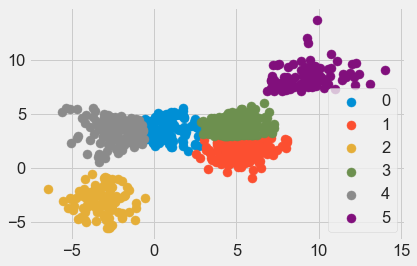

[0 0 0 ... 0 0 0]


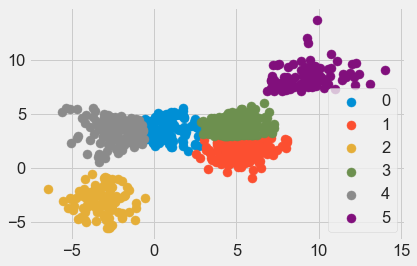

[0 0 0 ... 0 0 0]


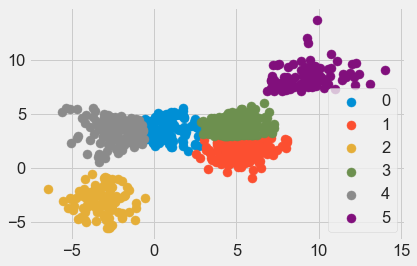

[0 0 0 ... 0 0 0]


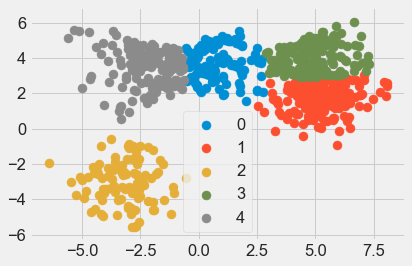

[0 0 0 ... 0 0 0]
0.4531919763890837 1.2
0.14204756563397533 10


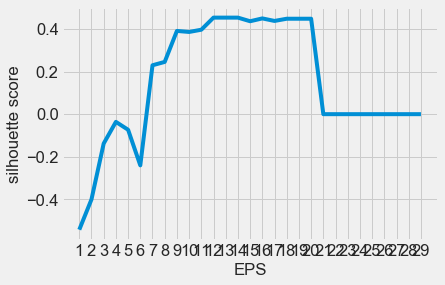

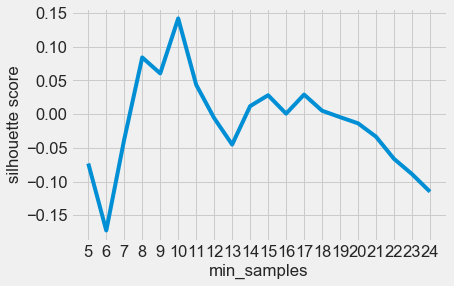

In [112]:
dbscan_silhouettee=[]
dbscan_silhouettem=[]
for e in range(1, 30):
    dbscan = DBSCAN(eps=e/10)
    labeld = dbscan.fit_predict( Multi_blob_Data)
    labeld +=1
    U_Labels = np.unique(labeld)
    for i in U_Labels:
        plt.scatter(Multi_blob_Data[label == i , 0] , Multi_blob_Data[label == i , 1] , label = i)
    plt.legend()
    plt.show()
    print(dbscan.labels_)
    result = all(element == labeld[0] for element in labeld)
    if(result != True):
        dbscan_silhouettee.append(silhouette_score(Multi_blob_Data, dbscan.labels_, metric='euclidean'))
    else:
        dbscan_silhouettee.append(0)
print(dbscan_silhouettee)
for m in range(5, 25):
    dbscan = DBSCAN(min_samples=m)
    labeldd = dbscan.fit_predict( Multi_blob_Data)
    labeldd +=1
    U_Labels = np.unique(labeldd)
    for i in U_Labels:
        plt.scatter(Multi_blob_Data[label == i , 0] , Multi_blob_Data[label == i , 1] , label = i)
    plt.legend()
    plt.show()
    print(dbscan.labels_)
    result = all(element == labeldd[0] for element in labeldd)
    if(result != True):
        dbscan_silhouettem.append(silhouette_score(Multi_blob_Data, dbscan.labels_, metric='euclidean'))
    else:
        dbscan_silhouettem.append(0)
best_score_eps=max(dbscan_silhouettee) 
best_score_min_samples=max(dbscan_silhouettem)
best_eps=(dbscan_silhouettee.index(best_score_eps)+1)/10
best_min_samples=dbscan_silhouettem.index(best_score_min_samples)+5
print(best_score_eps,best_eps)
print(best_score_min_samples,best_min_samples)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), dbscan_silhouettee)
plt.xticks(range(1, 30))
plt.xlabel("EPS")
plt.ylabel("silhouette score")
plt.show()
plt.style.use("fivethirtyeight")
plt.plot(range(5, 25), dbscan_silhouettem)
plt.xticks(range(5, 25))
plt.xlabel("min_samples")
plt.ylabel("silhouette score")
plt.show()


### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

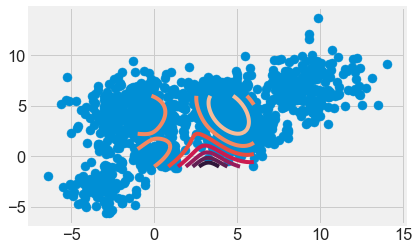

In [134]:
gmm = GaussianMixture(n_components=4,covariance_type='full')
gmm.fit(Multi_blob_Data)
X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(Multi_blob_Data[:, 0],Multi_blob_Data [:, 1])
plt.show()

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [140]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
Scaler = StandardScaler()
Scaler.fit(iris_data.data)
iris_final = Scaler.transform(iris_data.data)
iris_final


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 